#### Libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.stats import mode
from helpers_preprocessing import *

### Read the Data

In [2]:
# Input & Output Paths
img_paths_src_dict = {
    'training': r'data\Bone Age Datasets\Bone Age Training Set\boneage-training-dataset\boneage-training-dataset'
    , 'validation_1': r'data\Bone Age Datasets\Bone Age Validation Set\boneage-validation-dataset-1\boneage-validation-dataset-1'
    , 'validation_2': r'data\Bone Age Datasets\Bone Age Validation Set\boneage-validation-dataset-2\boneage-validation-dataset-2'
    , 'test': r'data\Bone Age Datasets\Bone Age Test Set\Test Set Images'
}

img_paths_dest_dict = {
    'training': r'data\pre_processed\training'
    , 'validation_1': r'data\pre_processed\validation'
    , 'validation_2': r'data\pre_processed\validation'
    , 'test': r'data\pre_processed\test'
}

for path in img_paths_dest_dict.values():
    path_exists = os.path.exists(path)
    if not path_exists:
        # Create the directory if it doesn't exist
        print('not exists')
        os.makedirs(path)

# Get the relative paths for all images per split of the data
img_rel_paths_dict = {}

for split in img_paths_src_dict:
    rel_paths_split = {}
    dir = img_paths_src_dict[split]
    file_names = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    relative_paths = [os.path.join(dir, f) for f in file_names]

    for path in relative_paths:
        img_id = int((path.split('\\')[-1]).split('.')[0])
        rel_paths_split[img_id] = path

    img_rel_paths_dict[split] = rel_paths_split

### Exploratory Data Analysis

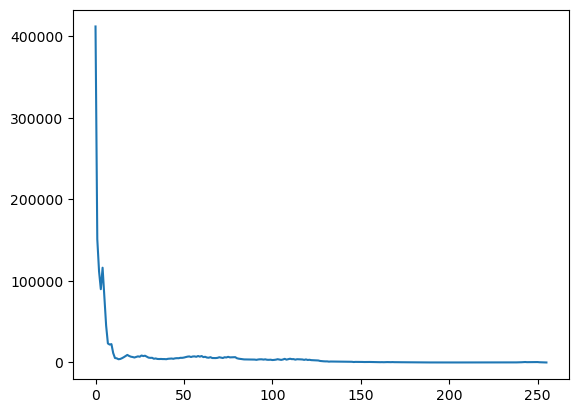

In [3]:
# Define where the sampling is done
split_sampling = 'training'

# Take % amount of samples of images from the training set to analyze
random.seed(642)
perc_samples = 0.25
n_samples = int(round(perc_samples*len(img_rel_paths_dict[split_sampling]), 0))
img_paths_analysis = random.sample(list(img_rel_paths_dict[split_sampling].keys()), n_samples)

# Read the images, preprocess and put both the source and the pre-processed image into a dictionary 
images = []
for img_key in img_paths_analysis:
    img_src = cv.imread(img_rel_paths_dict[split_sampling][img_key])
    images.append(img_src)

# The histogram for all images
hist = cv.calcHist(images, [0], None, [256], [0,256])
plt.plot(hist) 
plt.show()

### Decomposition of the pipeline

C:\Users\andresespinalh\AppData\Local\Temp\ipykernel_26048\646273854.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  imgs_test = random.sample(img_rel_paths_dict['training'].keys(), 10)


[[   7.732994  174.68591 ]
 [1095.7257     22.308716]
 [1322.5153   1641.6156  ]
 [ 234.52258  1793.9928  ]]
[[ 234.52258  1793.9928  ]
 [   7.732994  174.68591 ]
 [1095.7257     22.308716]
 [1322.5153   1641.6156  ]]
Image: 10159
Original Resolution (1727, 1248)
Crop Resolution (1098, 1635)


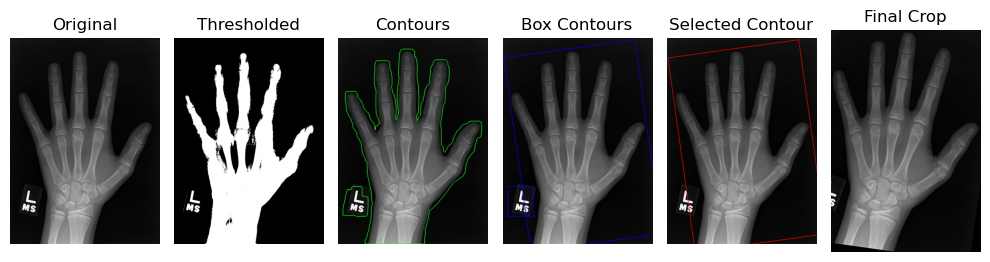

[[ 220.84741   160.18585 ]
 [1198.4877     62.489807]
 [1387.4667   1953.5945  ]
 [ 409.82642  2051.2905  ]]
[[ 409.82642  2051.2905  ]
 [ 220.84741   160.18585 ]
 [1198.4877     62.489807]
 [1387.4667   1953.5945  ]]
Image: 11453
Original Resolution (2014, 1400)
Crop Resolution (982, 1900)


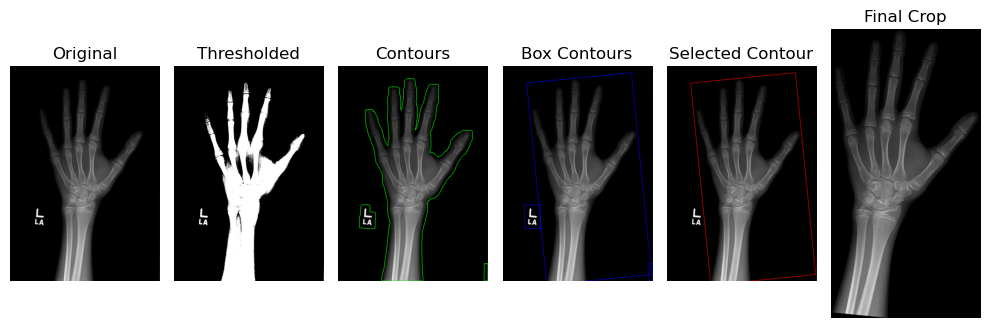

[[-5.1220855e-14  0.0000000e+00]
 [ 1.0770000e+03  0.0000000e+00]
 [ 1.0770000e+03  1.6730000e+03]
 [ 0.0000000e+00  1.6730000e+03]]
[[ 0.0000000e+00  1.6730000e+03]
 [-5.1220855e-14  0.0000000e+00]
 [ 1.0770000e+03  0.0000000e+00]
 [ 1.0770000e+03  1.6730000e+03]]
Image: 15425
Original Resolution (1674, 1078)
Crop Resolution (1077, 1673)


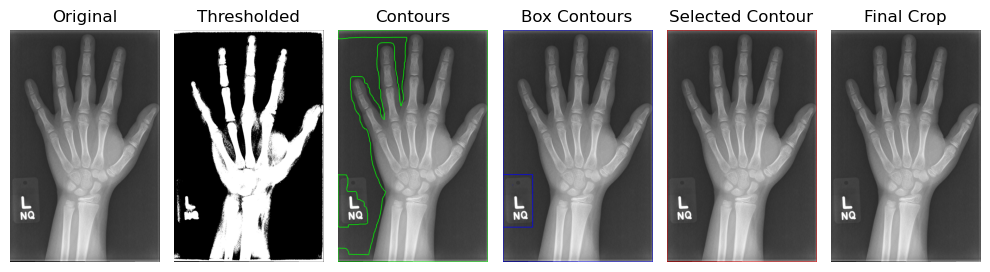

[[  44.107025  156.30481 ]
 [ 872.8313      4.180298]
 [1108.4268   1287.6271  ]
 [ 279.7025   1439.7516  ]]
[[ 279.7025   1439.7516  ]
 [  44.107025  156.30481 ]
 [ 872.8313      4.180298]
 [1108.4268   1287.6271  ]]
Image: 9387
Original Resolution (1377, 1030)
Crop Resolution (842, 1304)


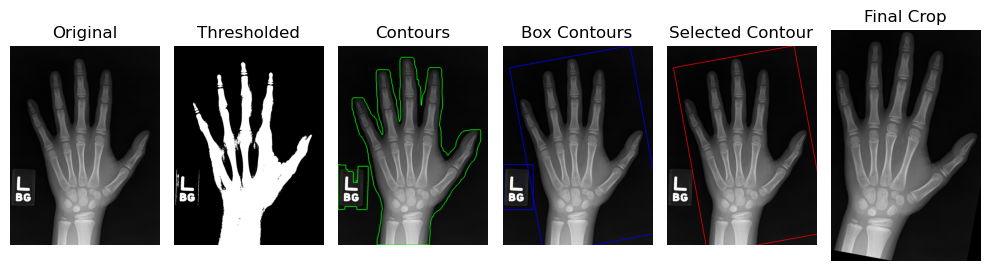

[[ 282.91687  147.9939 ]
 [1355.8226    45.40918]
 [1501.7374  1571.4937 ]
 [ 428.83167 1674.0784 ]]
[[ 428.83167 1674.0784 ]
 [ 282.91687  147.9939 ]
 [1355.8226    45.40918]
 [1501.7374  1571.4937 ]]
Image: 14085
Original Resolution (1635, 1546)
Crop Resolution (1077, 1533)


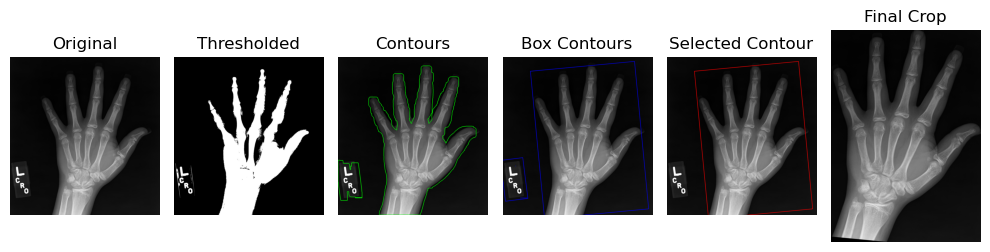

[[ 221.98228    123.47412  ]
 [1252.8363       7.4033203]
 [1458.3141    1832.3018   ]
 [ 427.46008   1948.3726   ]]
[[ 427.46008   1948.3726   ]
 [ 221.98228    123.47412  ]
 [1252.8363       7.4033203]
 [1458.3141    1832.3018   ]]
Image: 12350
Original Resolution (1892, 1377)
Crop Resolution (1037, 1836)


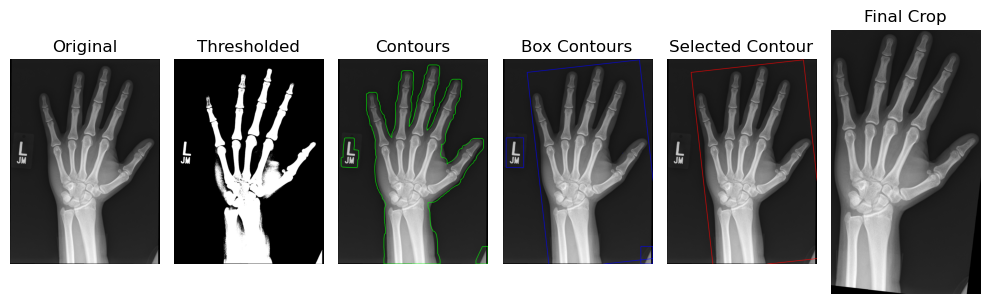

[[-159.845   1086.0876 ]
 [ 240.22849  -91.31511]
 [1023.6034   174.87036]
 [ 623.5299  1352.2731 ]]
[[ 623.5299  1352.2731 ]
 [-159.845   1086.0876 ]
 [ 240.22849  -91.31511]
 [1023.6034   174.87036]]
Image: 14007
Original Resolution (1243, 1012)
Crop Resolution (1243, 827)


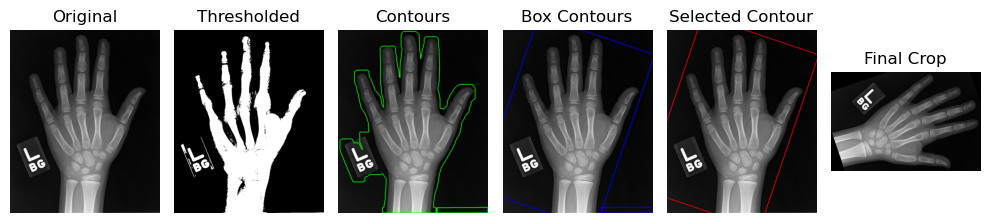

[[ 222.6033    125.60681 ]
 [1199.176     -18.840942]
 [1414.051    1433.8718  ]
 [ 437.47827  1578.3196  ]]
[[ 437.47827  1578.3196  ]
 [ 222.6033    125.60681 ]
 [1199.176     -18.840942]
 [1414.051    1433.8718  ]]
Image: 14477
Original Resolution (1522, 1351)
Crop Resolution (987, 1468)


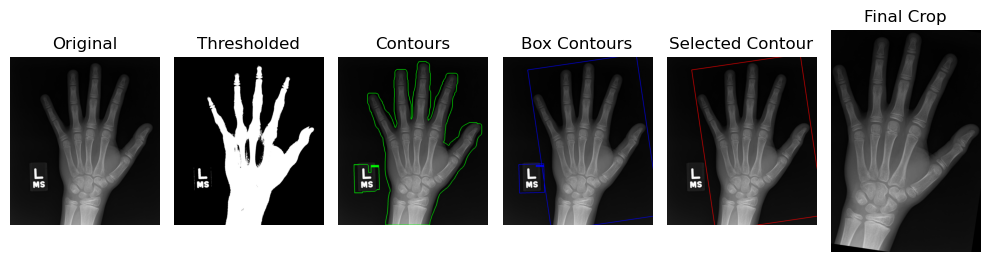

[[  24.640472  101.154785]
 [ 926.8303     10.248291]
 [1107.2767   1801.0653  ]
 [ 205.08691  1891.9718  ]]
[[ 205.08691  1891.9718  ]
 [  24.640472  101.154785]
 [ 926.8303     10.248291]
 [1107.2767   1801.0653  ]]
Image: 13398
Original Resolution (1803, 1099)
Crop Resolution (906, 1799)


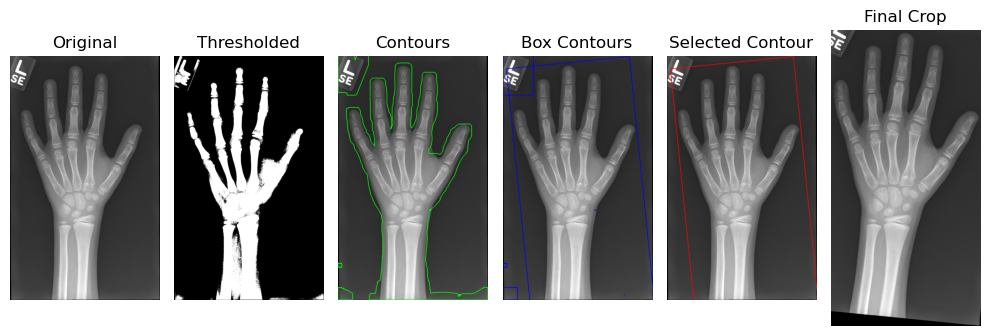

[[ 125.09558  2385.1367  ]
 [ 199.65588    61.881134]
 [1743.8103    111.437744]
 [1669.25     2434.6934  ]]
[[1669.25     2434.6934  ]
 [ 125.09558  2385.1367  ]
 [ 199.65588    61.881134]
 [1743.8103    111.437744]]
Image: 1932
Original Resolution (2570, 2040)
Crop Resolution (2324, 1544)


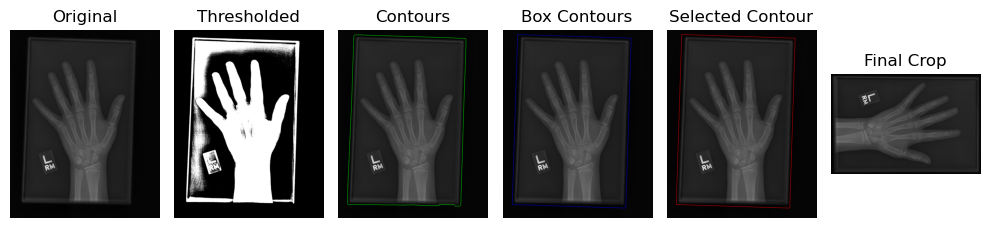

In [4]:
img_paths_analysis = img_rel_paths_dict['training']
# imgs_test = [1378, 1379, 1381, 1435, 1430, 3000, 3001, 3213, 3438, 3476]
random.seed(206)
imgs_test = random.sample(img_rel_paths_dict['training'].keys(), 10)

for img_key in imgs_test:
    img_path = img_paths_analysis[img_key]
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_e = enhance_contrast_img(img, clipLimit=2, tileGridSize=(10, 10))

    # First perform Binary Thresholding through the Otsu method
    tc_o, img_thr_o = cv.threshold(img_e, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Apply a Gaussian Blur
    img_blur_o = cv.GaussianBlur(img_thr_o, (71, 71), 333)

    # Find all contours on the blurred image
    contours_o, hier_o = cv.findContours(img_blur_o, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Draw Original Contours
    img_c = np.copy(img)
    img_c = cv.cvtColor(img_c, cv.COLOR_GRAY2BGR)
    cv.drawContours(img_c, contours_o, -1, (0, 255, 0), 3)

    # Draw boxed contours
    img_box = np.copy(img)
    img_box = cv.cvtColor(img_box, cv.COLOR_GRAY2BGR)

    for contour in contours_o:
        rect = cv.minAreaRect(contour)
        box = cv.boxPoints(rect)
        cv.drawContours(img_box, [np.int0(box)], 0, (255, 0, 0), 3)

    # Select only the outermost contour
    largest_contour = max(contours_o, key=cv.contourArea)

    # Get the rotated bounding box of the largest contour
    rect = cv.minAreaRect(largest_contour)
    box = cv.boxPoints(rect)

    # Draw the selected boxed contour
    img_rot = np.copy(img)
    img_rot = cv.cvtColor(img_rot, cv.COLOR_GRAY2BGR)
    cv.drawContours(img_rot, [np.int0(box)], 0, (0, 0, 255), 3)

    # Get the proportion of the total area of the image from the outermost contour
    img_tot_pixels = img.shape[0]*img.shape[1]
    contour_perc = cv.contourArea(largest_contour)/img_tot_pixels

    print(box)
    print(np.roll(box, 1, axis=0))

    # If the contour found is composed by a percentage bigger than the threshold, perform the crop. Otherwise leave the image as it is
    if(contour_perc > 0.10):
        # Get a bounding box representing the outermost rectangle
        x, y, w, h = cv.boundingRect(box)

        # Get the center of the bounding box
        center = (x + w // 2, y + h // 2)

        # Define a set of points that represent the x-axis and y-axis in the bounding box
        # NOTE: Indexing of the rectangle starts on the bottom left corner (Index 0) and ends on the top left corner (Index 3)
        p1_x, p2_x, p1_y, p2_y = box[0], box[1], box[0], box[3]

        # Calculate the distance between the points for the horizontal and vertical axis (This is the resolution of the box)
        res_x = int(np.sqrt(np.sum((p2_x - p1_x)**2)))
        res_y = int(np.sqrt(np.sum((p2_y - p1_y)**2)))

        size = (res_x, res_y)
        

        # Get the rotation matrix for rotating the image
        M = cv.getPerspectiveTransform(box, np.array([[0, 0], [res_x, 0], [res_x, res_y], [0, res_y]], dtype=np.float32))

        # Crop the image based on the perspective transform matrix
        img_p = cv.warpPerspective(img, M, size) 
    else:
        img_p = img

    # Compute the mean color of the border pixels of the rectangular image
    h, w = img_p.shape[:2]
    max_side = max(h, w)
    square_img = np.zeros((max_side, max_side), np.uint8)
    start_row = int((max_side - h) / 2)
    start_col = int((max_side - w) / 2)
    square_img[start_row:start_row + h, start_col:start_col + w] = img_p

    # img_p_e = enhance_contrast_img(img_p, clipLimit=2, tileGridSize=(10, 10))
    print('Image: {0}'.format(img_key))
    print('Original Resolution ({0}, {1})'.format(img.shape[0], img.shape[1]))
    print('Crop Resolution ({0}, {1})'.format(res_x, res_y))
    imgs_comp = [img, img_thr_o, img_c, img_box, img_rot, img_p]
    labels = ['Original', 'Thresholded', 'Contours', 'Box Contours', 'Selected Contour', 'Final Crop']
    display_img_comp(imgs_comp, labels)

### Comparison of Experiments

1378


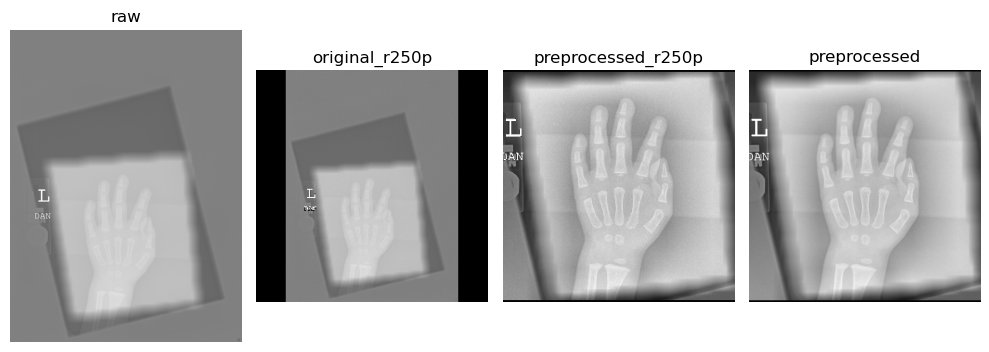

1379


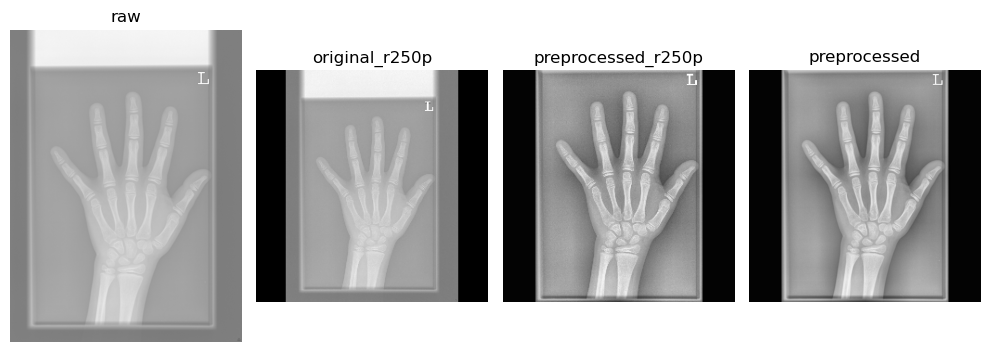

1381


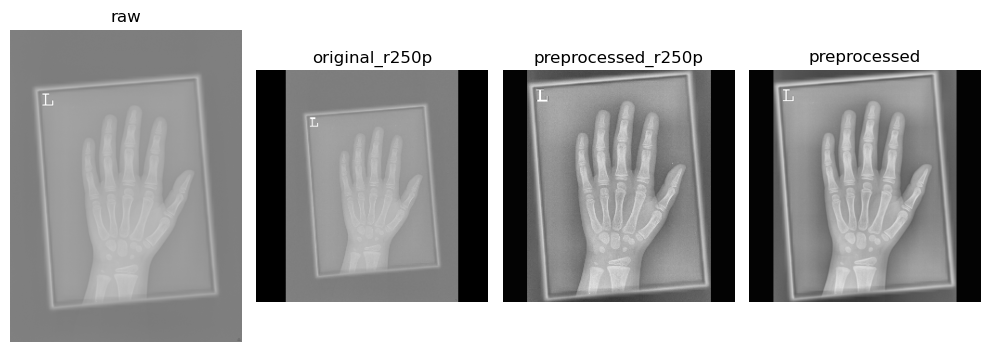

1435


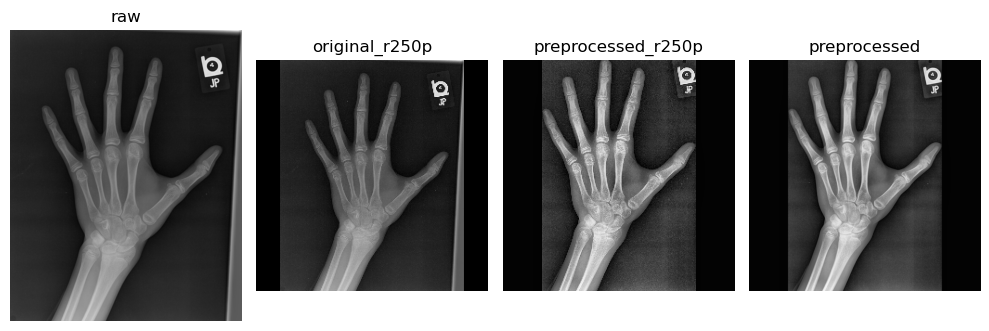

1430


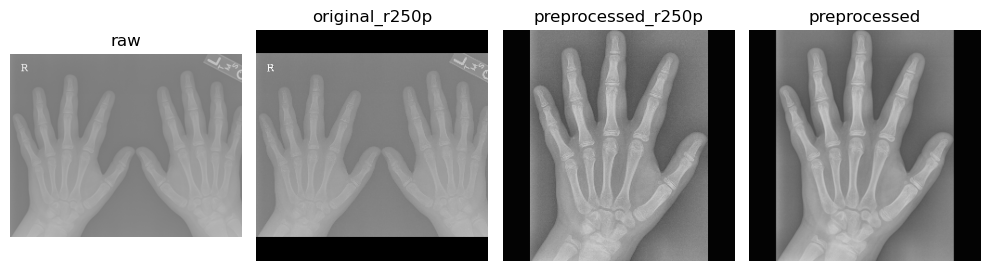

3000


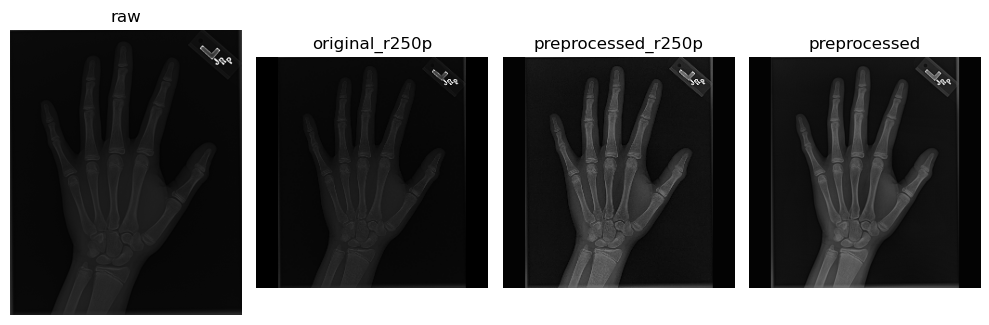

3001


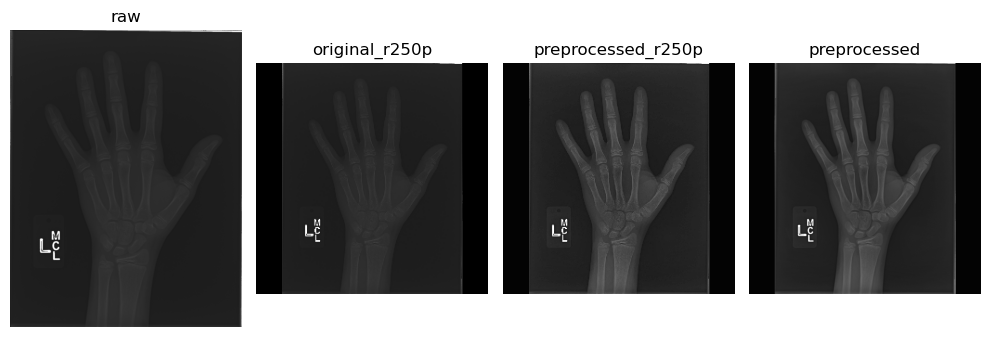

3213


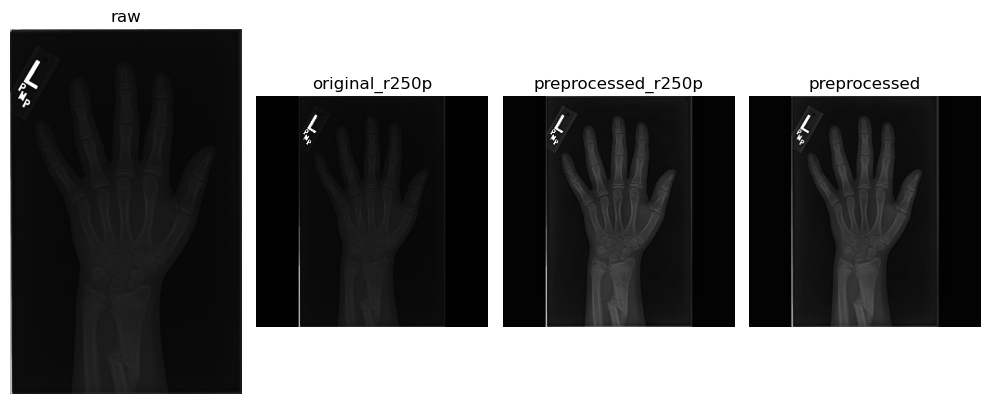

3438


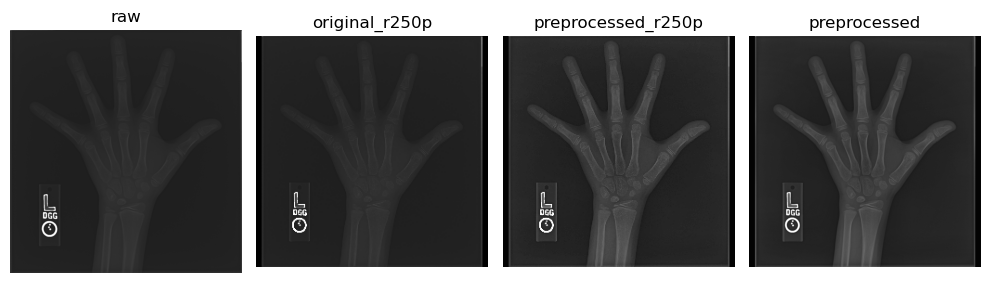

3476


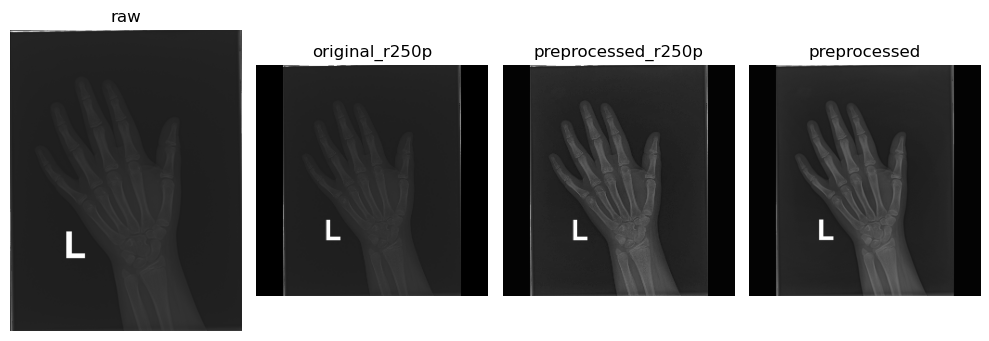

In [4]:
img_paths_analysis = img_rel_paths_dict['training']
imgs_test = [1378, 1379, 1381, 1435, 1430, 3000, 3001, 3213, 3438, 3476]
# random.seed(450)
# imgs_test = random.sample(img_rel_paths_dict['training'].keys(), 10)

for img_key in imgs_test:
    img_path = img_paths_analysis[img_key]
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Preprocessing
    img_o = preprocess_image(img, 'original_r250p')
    img_p = preprocess_image(img, 'preprocessed_r250p')
    img_p2 = preprocess_image(img, 'preprocessed')

    
    print(img_key)
    # print('Image: {0}'.format(img_key))
    # print('Original Resolution ({0}, {1})'.format(img.shape[0], img.shape[1]))
    # print('Crop Resolution ({0}, {1})'.format(res_x, res_y))

    imgs_comp = [img, img_o, img_p, img_p2]
    labels = ['raw', 'original_r250p', 'preprocessed_r250p', 'preprocessed']
    display_img_comp(imgs_comp, labels)